# Development notebook: Tests for QuTiP's stochastic master equation solver

Copyright (C) 2011 and later, Paul D. Nation & Robert J. Johansson

In this notebook we test the qutip stochastic master equation solver (smesolve) with a few textbook examples taken from the book Quantum Optics, by Walls and Milburn, section 6.7.

<style>
.rendered_html {
    font-family: Liberation Serif;
}

.rendered_html h1 {
    font-family: Liberation Sans;
    margin: 0 0;
}

.rendered_html h2 {
    font-family: Liberation Sans;
    margin: 0 0;
}
</style>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qutip import *

## Photo-count detection

### Theory

Stochastic master equation in Milburn's formulation

$\displaystyle d\rho(t) = dN(t) \mathcal{G}[a] \rho(t) - dt \gamma \mathcal{H}[\frac{1}{2}a^\dagger a] \rho(t)$

where

$\displaystyle \mathcal{G}[A] \rho = \frac{A\rho A^\dagger}{\mathrm{Tr}[A\rho A^\dagger]} - \rho$

$\displaystyle \mathcal{H}[A] \rho = \frac{1}{2}(A\rho + \rho A^\dagger - \mathrm{Tr}[A\rho + \rho A^\dagger] \rho) $

and $dN(t)$ is a Poisson distributed increment with $E[dN(t)] = \gamma \langle a^\dagger a\rangle (t)dt$.

### Formulation in QuTiP

In QuTiP we write the stochastic master equation on the form (in the interaction picture, with no deterministic dissipation):

$\displaystyle d\rho(t) = D_{1}[A]\rho(t) dt + D_{2}[A]\rho(t) dW$

where $A = \sqrt{\gamma} a$, so we can identify

$\displaystyle D_{1}[A]\rho(t) = - \frac{1}{2}\gamma \mathcal{H}[a^\dagger a] \rho(t)
= -\gamma \frac{1}{2}\left( a^\dagger a\rho + \rho a^\dagger a - \mathrm{Tr}[a^\dagger a\rho + \rho a^\dagger a] \rho \right)
= -\frac{1}{2}\left( A^\dagger A\rho + \rho A^\dagger A - \mathrm{Tr}[A^\dagger A\rho + \rho A^\dagger A] \rho \right)$

$\displaystyle D_{2}[A]\rho(t) = \mathcal{G}[a] \rho = \frac{A\rho A^\dagger}{\mathrm{Tr}[A\rho A^\dagger]} - \rho$

and 

$dW = dN(t)$

and $A = \sqrt{\gamma} a$ is the collapse operator including the rate of the process as a coefficient in the operator.

### Reference solution: deterministic master equation

In [3]:
N = 10
w0 = 0.5 * 2 * np.pi
times = np.linspace(0, 15, 150)
dt = times[1] - times[0]
gamma = 0.25
A = 2.5
ntraj = 50
nsubsteps = 50

In [4]:
a = destroy(N)
x = a + a.dag()

In [5]:
H = w0 * a.dag() * a

In [6]:
#rho0 = coherent(N, 5)
rho0 = fock(N, 5)

In [7]:
c_ops = [np.sqrt(gamma) * a]

In [8]:
e_ops = [a.dag() * a, x]

In [9]:
result_ref = mesolve(H, rho0, times, c_ops, e_ops)

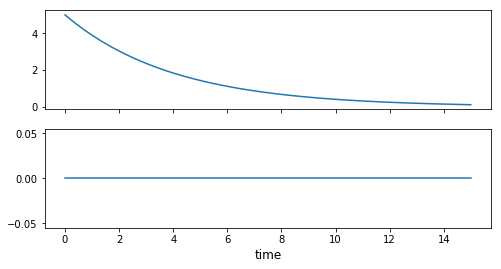

In [10]:
plot_expectation_values(result_ref);

### Solve using stochastic master equation

$\displaystyle D_{1}[a, \rho] = -\gamma \frac{1}{2}\left( a^\dagger a\rho + \rho a^\dagger a - \mathrm{Tr}[a^\dagger a\rho + \rho a^\dagger a] \right)
\rightarrow - \frac{1}{2}(\{A^\dagger A\}_L + \{A^\dagger A\}_R)\rho_v + \mathrm{E}[(\{A^\dagger A\}_L + \{A^\dagger A\}_R)\rho_v]$


$\displaystyle D_{2}[A, \rho(t)] = \frac{A\rho A^\dagger}{\mathrm{Tr}[A\rho A^\dagger]} - \rho 
\rightarrow \frac{A_LA^\dagger_R \rho_v}{\mathrm{E}[A_LA^\dagger_R \rho_v]} - \rho_v$

#### Using QuTiP built-in photo-current detection functions for $D_1$ and $D_2$

In [11]:
result = photocurrentmesolve(H, rho0, times, c_ops=[], sc_ops=c_ops, e_ops=e_ops, 
                  ntraj=ntraj, nsubsteps=nsubsteps,
                  store_measurement=True, noise=1234)

10.0%. Run time:   0.51s. Est. time left: 00:00:00:04
20.0%. Run time:   1.02s. Est. time left: 00:00:00:04
30.0%. Run time:   1.50s. Est. time left: 00:00:00:03
40.0%. Run time:   2.01s. Est. time left: 00:00:00:03
50.0%. Run time:   2.53s. Est. time left: 00:00:00:02
60.0%. Run time:   3.04s. Est. time left: 00:00:00:02
70.0%. Run time:   3.55s. Est. time left: 00:00:00:01
80.0%. Run time:   4.04s. Est. time left: 00:00:00:01
90.0%. Run time:   4.56s. Est. time left: 00:00:00:00
Total run time:   5.05s


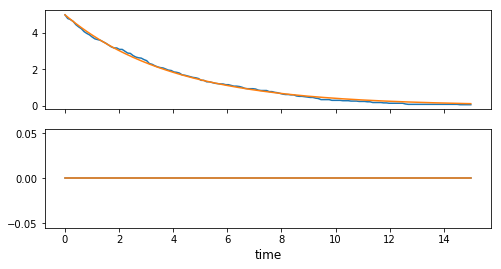

In [12]:
plot_expectation_values([result, result_ref]);

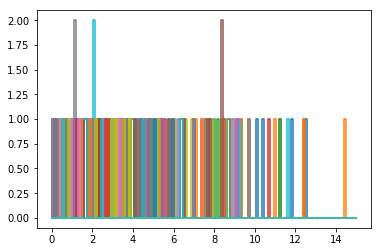

In [13]:
for m in result.measurement:
    plt.step(times, dt * m.real)

#### Solve problem again, with the same noise as the previous run
photocurrentmesolve does not take custom noise, but you can set the seed.

In [14]:
result = photocurrentmesolve(H, rho0, times, c_ops=[], sc_ops=c_ops, e_ops=e_ops, 
                  ntraj=ntraj, nsubsteps=nsubsteps, store_measurement=True, noise=1234)

10.0%. Run time:   0.51s. Est. time left: 00:00:00:04
20.0%. Run time:   1.01s. Est. time left: 00:00:00:04
30.0%. Run time:   1.51s. Est. time left: 00:00:00:03
40.0%. Run time:   2.00s. Est. time left: 00:00:00:02
50.0%. Run time:   2.53s. Est. time left: 00:00:00:02
60.0%. Run time:   3.04s. Est. time left: 00:00:00:02
70.0%. Run time:   3.58s. Est. time left: 00:00:00:01
80.0%. Run time:   4.07s. Est. time left: 00:00:00:01
90.0%. Run time:   4.59s. Est. time left: 00:00:00:00
Total run time:   5.07s


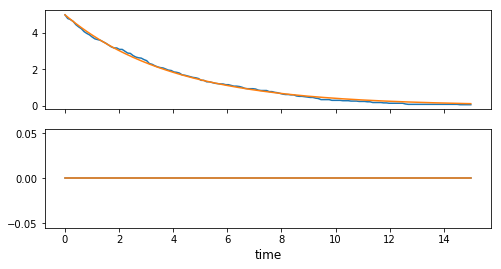

In [15]:
plot_expectation_values([result, result_ref]);

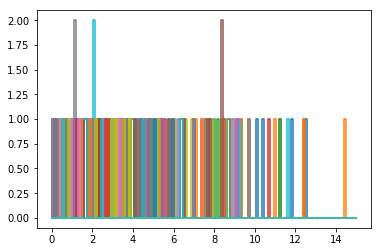

In [16]:
for m in result.measurement:
    plt.step(times, dt * m.real)

## Homodyne detection

In [17]:
H = w0 * a.dag() * a + A * (a + a.dag())

In [18]:
result_ref = mesolve(H, rho0, times, c_ops, e_ops)

### Theory

Stochastic master equation for homodyne in Milburn's formulation

$\displaystyle d\rho(t) = -i[H, \rho(t)]dt + \gamma\mathcal{D}[a]\rho(t) dt + dW(t) \sqrt{\gamma} \mathcal{H}[a] \rho(t)$

where $\mathcal{D}$ is the standard Lindblad dissipator superoperator, and $\mathcal{H}$ is defined as above,
and $dW(t)$ is a normal distributed increment with $E[dW(t)] = \sqrt{dt}$.

In QuTiP format we have:

$\displaystyle d\rho(t) = -i[H, \rho(t)]dt +  D_{1}[A]\rho(t) dt + D_{2}[A]\rho(t) dW$

where $A = \sqrt{\gamma} a$, so we can identify

$\displaystyle D_{1}[A]\rho(t) = \gamma \mathcal{D}[a]\rho(t) = \mathcal{D}[A]\rho(t)$

In [19]:
L = liouvillian(H, c_ops=c_ops).data
def d1_rho_func(t, rho_vec):
    return cy.spmv(L, rho_vec)

$\displaystyle D_{2}[A]\rho(t) = \sqrt{\gamma} \mathcal{H}[a]\rho(t) 
= A\rho + \rho A^\dagger - \mathrm{Tr}[A\rho + \rho A^\dagger] \rho
\rightarrow (A_L +  A_R^\dagger)\rho_v - \mathrm{Tr}[(A_L +  A_R^\dagger)\rho_v] \rho_v$

In [20]:
n_sum = spre(c_ops[0]) + spost(c_ops[0].dag())
n_sum_data = n_sum.data

def d2_rho_func(t, rho_vec):
    e1 = cy.cy_expect_rho_vec(n_sum_data, rho_vec, False)
    out = np.zeros((1,len(rho_vec)),dtype=complex)
    out += cy.spmv(n_sum_data, rho_vec) - e1 * rho_vec
    return out

In [21]:
result = general_stochastic(ket2dm(rho0), times, d1=d1_rho_func, d2=d2_rho_func, 
                            e_ops=[spre(op) for op in e_ops], ntraj=ntraj, solver="platen",
                            m_ops=[spre(a + a.dag())], dW_factors=[1/np.sqrt(gamma)],
                            nsubsteps=nsubsteps, store_measurement=True)

10.0%. Run time:   8.71s. Est. time left: 00:00:01:18
20.0%. Run time:  15.17s. Est. time left: 00:00:01:00
30.0%. Run time:  21.75s. Est. time left: 00:00:00:50
40.0%. Run time:  29.32s. Est. time left: 00:00:00:43
50.0%. Run time:  36.21s. Est. time left: 00:00:00:36
60.0%. Run time:  43.38s. Est. time left: 00:00:00:28
70.0%. Run time:  49.21s. Est. time left: 00:00:00:21
80.0%. Run time:  54.90s. Est. time left: 00:00:00:13
90.0%. Run time:  61.07s. Est. time left: 00:00:00:06
Total run time:  68.64s


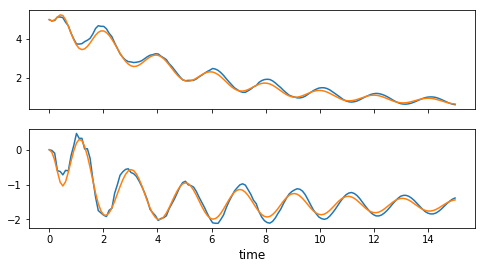

In [22]:
plot_expectation_values([result, result_ref]);

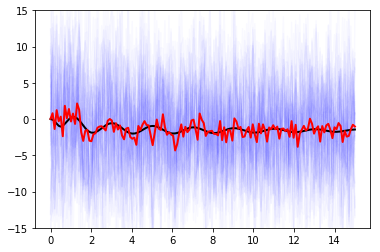

In [23]:
for m in result.measurement:
    plt.plot(times, m[:, 0].real, 'b', alpha=0.025)
    
plt.plot(times, result_ref.expect[1], 'k', lw=2);
plt.ylim(-15, 15)
plt.plot(times, np.array(result.measurement).mean(axis=0)[:,0].real, 'r', lw=2);

#### Using QuTiP built-in homodyne detection functions for $D_1$ and $D_2$

In [24]:
result = smesolve(H, rho0, times, [], c_ops, e_ops, ntraj=ntraj, nsubsteps=nsubsteps, solver="pc-euler",
                  method='homodyne', store_measurement=True)

10.0%. Run time:   2.16s. Est. time left: 00:00:00:19
20.0%. Run time:   4.48s. Est. time left: 00:00:00:17
30.0%. Run time:   6.31s. Est. time left: 00:00:00:14
40.0%. Run time:   7.82s. Est. time left: 00:00:00:11
50.0%. Run time:   9.63s. Est. time left: 00:00:00:09
60.0%. Run time:  10.96s. Est. time left: 00:00:00:07
70.0%. Run time:  12.35s. Est. time left: 00:00:00:05
80.0%. Run time:  13.78s. Est. time left: 00:00:00:03
90.0%. Run time:  15.31s. Est. time left: 00:00:00:01
Total run time:  16.83s


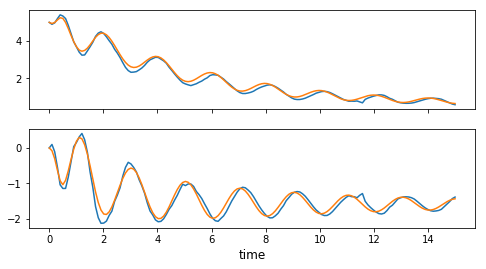

In [25]:
plot_expectation_values([result, result_ref]);

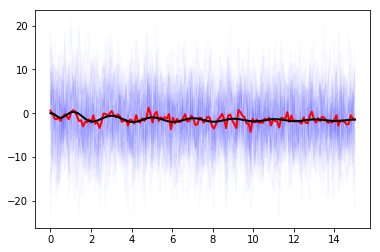

In [26]:
for m in result.measurement:
    plt.plot(times, m[:, 0].real / np.sqrt(gamma), 'b', alpha=0.025)
    
plt.plot(times, np.array(result.measurement).mean(axis=0)[:,0].real / np.sqrt(gamma), 'r', lw=2);
plt.plot(times, result_ref.expect[1], 'k', lw=2)

#### Solve problem again, this time with a specified noise (from previous run)

In [27]:
result = smesolve(H, rho0, times, [], c_ops, e_ops, ntraj=ntraj, nsubsteps=nsubsteps, solver="pc-euler",
                  method='homodyne', store_measurement=True, noise=result.noise)

10.0%. Run time:   2.10s. Est. time left: 00:00:00:18
20.0%. Run time:   3.43s. Est. time left: 00:00:00:13
30.0%. Run time:   5.08s. Est. time left: 00:00:00:11
40.0%. Run time:   6.41s. Est. time left: 00:00:00:09
50.0%. Run time:   7.85s. Est. time left: 00:00:00:07
60.0%. Run time:   9.34s. Est. time left: 00:00:00:06
70.0%. Run time:  10.65s. Est. time left: 00:00:00:04
80.0%. Run time:  12.02s. Est. time left: 00:00:00:03
90.0%. Run time:  13.34s. Est. time left: 00:00:00:01
Total run time:  14.67s


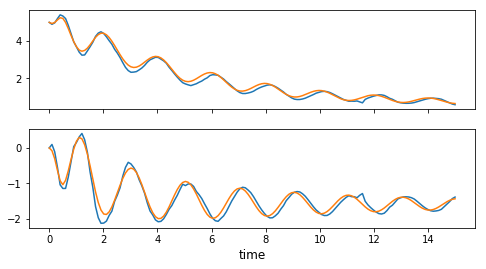

In [28]:
plot_expectation_values([result, result_ref]);

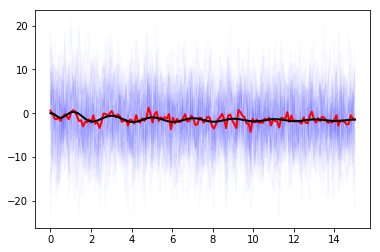

In [29]:
for m in result.measurement:
    plt.plot(times, m[:, 0].real / np.sqrt(gamma), 'b', alpha=0.025)
    
plt.plot(times, np.array(result.measurement).mean(axis=0)[:,0].real / np.sqrt(gamma), 'r', lw=2);
plt.plot(times, result_ref.expect[1], 'k', lw=2)

## Heterodyne detection

In [30]:
e_ops = [a.dag() * a, a + a.dag(), -1j * (a - a.dag())]

In [31]:
result_ref = mesolve(H, rho0, times, c_ops, e_ops)

Stochastic master equation for heterodyne in Milburn's formulation

$\displaystyle d\rho(t) = -i[H, \rho(t)]dt + \gamma\mathcal{D}[a]\rho(t) dt + \frac{1}{\sqrt{2}} dW_1(t) \sqrt{\gamma} \mathcal{H}[a] \rho(t) + \frac{1}{\sqrt{2}} dW_2(t) \sqrt{\gamma} \mathcal{H}[-ia] \rho(t)$

where $\mathcal{D}$ is the standard Lindblad dissipator superoperator, and $\mathcal{H}$ is defined as above,
and $dW_i(t)$ is a normal distributed increment with $E[dW_i(t)] = \sqrt{dt}$.

In QuTiP format we have:

$\displaystyle d\rho(t) = -i[H, \rho(t)]dt +  D_{1}[A]\rho(t) dt + D_{2}^{(1)}[A]\rho(t) dW_1 + D_{2}^{(2)}[A]\rho(t) dW_2$

where $A = \sqrt{\gamma} a$, so we can identify

$\displaystyle D_{1}[A]\rho = \gamma \mathcal{D}[a]\rho = \mathcal{D}[A]\rho$

In [32]:
#def d1_rho_func(A, rho_vec):
#    return A[7] * rho_vec

L = liouvillian(H, c_ops=c_ops).data
def d1_rho_func(t, rho_vec):
    return cy.spmv(L, rho_vec)

$D_{2}^{(1)}[A]\rho = \frac{1}{\sqrt{2}} \sqrt{\gamma} \mathcal{H}[a] \rho =
\frac{1}{\sqrt{2}} \mathcal{H}[A] \rho =
\frac{1}{\sqrt{2}}(A\rho + \rho A^\dagger - \mathrm{Tr}[A\rho + \rho A^\dagger] \rho)
\rightarrow \frac{1}{\sqrt{2}} \left\{(A_L +  A_R^\dagger)\rho_v - \mathrm{Tr}[(A_L +  A_R^\dagger)\rho_v] \rho_v\right\}$

$D_{2}^{(2)}[A]\rho = \frac{1}{\sqrt{2}} \sqrt{\gamma} \mathcal{H}[-ia] \rho 
= \frac{1}{\sqrt{2}} \mathcal{H}[-iA] \rho =
\frac{-i}{\sqrt{2}}(A\rho - \rho A^\dagger - \mathrm{Tr}[A\rho - \rho A^\dagger] \rho)
\rightarrow \frac{-i}{\sqrt{2}} \left\{(A_L -  A_R^\dagger)\rho_v - \mathrm{Tr}[(A_L - A_R^\dagger)\rho_v] \rho_v\right\}$

In [33]:
n_sump = spre(c_ops[0]) + spost(c_ops[0].dag())
n_sump_data = n_sump.data/np.sqrt(2)
n_summ = spre(c_ops[0]) - spost(c_ops[0].dag())
n_summ_data = -1.0j*n_summ.data/np.sqrt(2)

def d2_rho_func(A, rho_vec):
    out = np.zeros((2,len(rho_vec)),dtype=complex)

    e1 = cy.cy_expect_rho_vec(n_sump_data, rho_vec, False)
    out[0,:] += cy.spmv(n_sump_data, rho_vec) - e1 * rho_vec

    e1 = cy.cy_expect_rho_vec(n_summ_data, rho_vec, False)
    out[1,:] += cy.spmv(n_summ_data, rho_vec) - e1 * rho_vec

    return out



#def d2_rho_func(t, rho_vec):
#    e1 = cy.cy_expect_rho_vec(n_sum_data, rho_vec, False)
#    out = np.zeros((1,len(rho_vec)),dtype=complex)
#    out += cy.spmv(n_sum_data, rho_vec) - e1 * rho_vec
#    return out

In [34]:
result = general_stochastic(ket2dm(rho0), times, d1=d1_rho_func, d2=d2_rho_func, 
                  e_ops=[spre(op) for op in e_ops], solver="platen", # order=1
                  ntraj=ntraj, nsubsteps=nsubsteps, len_d2=2,
                  m_ops=[spre(a + a.dag()), (-1j)*spre(a - a.dag())],
                  dW_factors=[2/np.sqrt(gamma), 2/np.sqrt(gamma)],
                  store_measurement=True)

10.0%. Run time:  14.96s. Est. time left: 00:00:02:14
20.0%. Run time:  30.77s. Est. time left: 00:00:02:03
30.0%. Run time:  45.31s. Est. time left: 00:00:01:45
40.0%. Run time:  60.10s. Est. time left: 00:00:01:30
50.0%. Run time:  74.11s. Est. time left: 00:00:01:14
60.0%. Run time:  88.69s. Est. time left: 00:00:00:59
70.0%. Run time: 103.06s. Est. time left: 00:00:00:44
80.0%. Run time: 119.62s. Est. time left: 00:00:00:29
90.0%. Run time: 132.96s. Est. time left: 00:00:00:14
Total run time: 148.45s


(<Figure size 576x288 with 3 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f280b480898>],
       dtype=object))

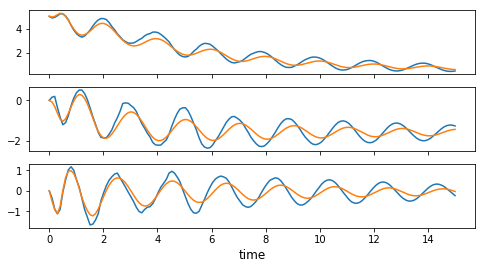

In [35]:
plot_expectation_values([result, result_ref])

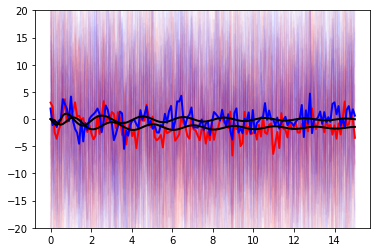

In [36]:
for m in result.measurement:
    plt.plot(times, m[:, 0].real, 'r', alpha=0.025)
    plt.plot(times, m[:, 1].real, 'b', alpha=0.025)

plt.ylim(-20, 20)
    
plt.plot(times, np.array(result.measurement).mean(axis=0)[:,0].real, 'r', lw=2);
plt.plot(times, np.array(result.measurement).mean(axis=0)[:,1].real, 'b', lw=2);

plt.plot(times, result_ref.expect[1], 'k', lw=2);
plt.plot(times, result_ref.expect[2], 'k', lw=2);

#### Using QuTiP built-in heterodyne detection functions for $D_1$ and $D_2$

In [37]:
result = smesolve(H, rho0, times, [], c_ops, e_ops, ntraj=ntraj, nsubsteps=nsubsteps, solver="milstein", # order=1
                  method='heterodyne', store_measurement=True)

10.0%. Run time:   1.97s. Est. time left: 00:00:00:17
20.0%. Run time:   3.97s. Est. time left: 00:00:00:15
30.0%. Run time:   5.90s. Est. time left: 00:00:00:13
40.0%. Run time:   7.47s. Est. time left: 00:00:00:11
50.0%. Run time:   9.16s. Est. time left: 00:00:00:09
60.0%. Run time:  10.82s. Est. time left: 00:00:00:07
70.0%. Run time:  12.73s. Est. time left: 00:00:00:05
80.0%. Run time:  14.71s. Est. time left: 00:00:00:03
90.0%. Run time:  16.42s. Est. time left: 00:00:00:01
Total run time:  18.10s


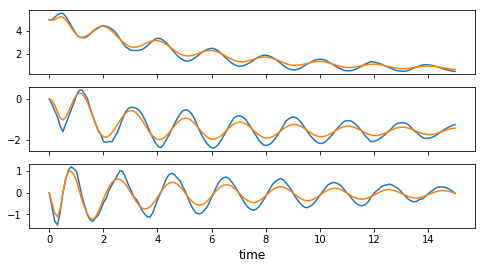

In [38]:
plot_expectation_values([result, result_ref]);

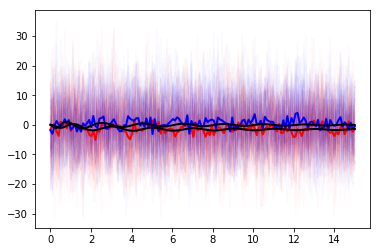

In [39]:
for m in result.measurement:
    plt.plot(times, m[:, 0, 0].real / np.sqrt(gamma), 'r', alpha=0.025)
    plt.plot(times, m[:, 0, 1].real / np.sqrt(gamma), 'b', alpha=0.025)
    
plt.plot(times, np.array(result.measurement).mean(axis=0)[:,0,0].real / np.sqrt(gamma), 'r', lw=2);
plt.plot(times, np.array(result.measurement).mean(axis=0)[:,0,1].real / np.sqrt(gamma), 'b', lw=2);

plt.plot(times, result_ref.expect[1], 'k', lw=2);
plt.plot(times, result_ref.expect[2], 'k', lw=2);

#### Solve problem again, this time with a specified noise (from previous run)

In [40]:
result = smesolve(H, rho0, times, [], c_ops, e_ops, ntraj=ntraj, nsubsteps=nsubsteps, solver="milstein", # order=1
                  method='heterodyne', store_measurement=True, noise=result.noise)

10.0%. Run time:   1.72s. Est. time left: 00:00:00:15
20.0%. Run time:   3.62s. Est. time left: 00:00:00:14
30.0%. Run time:   5.81s. Est. time left: 00:00:00:13
40.0%. Run time:   8.36s. Est. time left: 00:00:00:12
50.0%. Run time:  10.43s. Est. time left: 00:00:00:10
60.0%. Run time:  12.62s. Est. time left: 00:00:00:08
70.0%. Run time:  14.47s. Est. time left: 00:00:00:06
80.0%. Run time:  16.06s. Est. time left: 00:00:00:04
90.0%. Run time:  18.58s. Est. time left: 00:00:00:02
Total run time:  20.57s


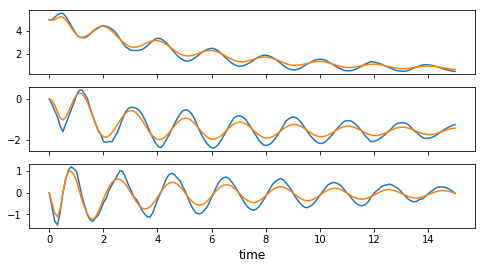

In [41]:
plot_expectation_values([result, result_ref]);

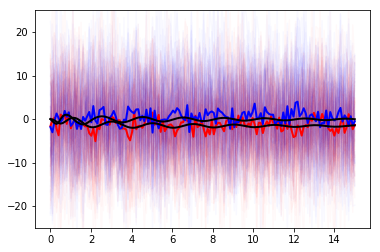

In [42]:
for m in result.measurement:
    plt.plot(times, m[:, 0, 0].real / np.sqrt(gamma), 'r', alpha=0.025)
    plt.plot(times, m[:, 0, 1].real / np.sqrt(gamma), 'b', alpha=0.025)
    
plt.plot(times, np.array(result.measurement).mean(axis=0)[:,0,0].real / np.sqrt(gamma), 'r', lw=2);
plt.plot(times, np.array(result.measurement).mean(axis=0)[:,0,1].real / np.sqrt(gamma), 'b', lw=2);

plt.plot(times, result_ref.expect[1], 'k', lw=2);
plt.plot(times, result_ref.expect[2], 'k', lw=2);

plt.axis('tight')
plt.ylim(-25, 25);

### Software version

In [43]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.4.0.dev0+1cf1dd3e
Numpy,1.16.0
SciPy,1.2.0
matplotlib,3.0.2
Cython,0.29.2
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,7.2.0
Python,"3.6.7 (default, Oct 22 2018, 11:32:17) [GCC 8.2.0]"
OS,posix [linux]
